In [2]:
import itertools
import matlab.engine
import plotly.express as px

import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import time
import pandas as pd
import glob
from copy import deepcopy
import os
import sys
from joblib import Parallel, delayed, cpu_count, dump,load
import plotly.express as px

project_path = r'E:\pirate_fmri\Analysis'
sys.path.append(os.path.join(project_path,'src'))
from multivariate.MVPA_estimator import CompositionalRSA
from multivariate.modelrdms import ModelRDM
from multivariate.rsa_runner import RSARunner


from zpyhelper.filesys import checkdir
from zpyhelper.MVPA.rdm import compute_rdm,lower_tri,upper_tri, compute_rdm_nomial, compute_rdm_identity, compute_rdm_residual
from zpyhelper.MVPA.preprocessors import scale_feature, average_odd_even_session,normalise_multivariate_noise, split_data, concat_data, extract_pc
from zpyhelper.MVPA.estimators import PatternCorrelation, MultipleRDMRegression, NeuralRDMStability


import sklearn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import MDS,TSNE 
import sklearn.manifold as manifold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor,MultiOutputClassifier
from sklearn.model_selection import LeaveOneGroupOut,LeavePGroupsOut
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import OneHotEncoder

import scipy
from scipy.spatial.distance import pdist, squareform


In [4]:
data_dir = r'E:\pirate_fmri\Analysis\data\Exp1_fmri\fmri\unsmoothedLSA\rsa_searchlight\fourruns_noselection_mvnn_aoe\correlation\all_nanidentity'

config_json_path = os.path.join(data_dir,"first","sub001","searchlight.json")
with open(config_json_path) as f:
    rsa_config = json.load(f)

rsa_config.keys()

dict_keys(['searchlight_config', 'estimator'])

In [10]:
print(rsa_config["estimator"].keys())

dict_keys(['name', 'corrtype', 'NAfilters', 'modelRDMs'])


dict_keys(['name', 'corrtype', 'NAfilters', 'modelRDMs'])


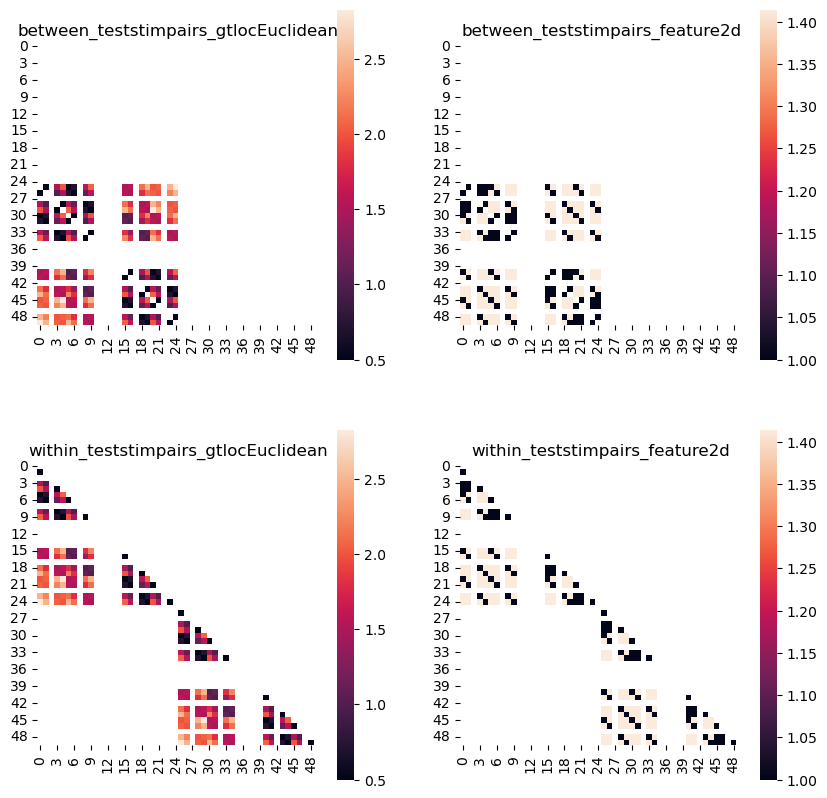

In [15]:
print(rsa_config["estimator"].keys())
model_rdms = ['gtlocEuclidean','feature2d']
fig,axes = plt.subplots(2,len(model_rdms),figsize=(10,10))
for j,mname in enumerate(model_rdms):

    kname = f"between_teststimpairs_{mname}"
    vs = rsa_config["estimator"]["modelRDMs"][kname]
    pmat = np.full((50,50),fill_value=np.nan)
    pmat[lower_tri(pmat)[1]] = vs
    sns.heatmap(pmat,ax=axes[0,j],square=True)
    axes[0,j].set_title(kname)


    kname = f"within_teststimpairs_{mname}"
    vs = rsa_config["estimator"]["modelRDMs"][kname]
    pmat = np.full((50,50),fill_value=np.nan)
    pmat[lower_tri(pmat)[1]] = vs
    sns.heatmap(pmat,ax=axes[1,j],square=True)    
    axes[1,j].set_title(kname)